# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure all columns are shown when printing DataFrames
pd.set_option('display.max_columns', None)

# Pipeline

In [2]:
# ------------------------------------------
# Generate all possible results from rolling two d20s
# ------------------------------------------
d20 = np.arange(1, 21)
all_rolls = [(a, b) for a in d20 for b in d20]

# Calculate the maximum value of each roll pair
max_values = [max(a, b) for a, b in all_rolls]

# Count frequency of each possible max result (from 1 to 20)
max_counts = pd.Series(max_values).value_counts().sort_index()

# Build DataFrame with max values and their frequencies
df = pd.DataFrame({
    "Maior Valor": max_counts.index,
    "Frequencia": max_counts.values
})

# ------------------------------------------
# Compute probability of getting each max value with advantage (2d20)
# ------------------------------------------
df["Probabilidade Vantagem"] = df["Frequencia"] / 400  # total combinations: 20 * 20 = 400

# Compute cumulative success rate from that value upward (reversed cumulative sum)
df["Chance de Sucesso Vantagem"] = df["Probabilidade Vantagem"][::-1].cumsum()[::-1]
df["Chance de Sucesso Vantagem %"] = df["Chance de Sucesso Vantagem"] * 100

# ------------------------------------------
# Compute baseline probabilities for 1d20 (each value has 5% chance)
# ------------------------------------------
df["Probabilidade 1d20"] = 1 / 20
df["Chance de Sucesso"] = df["Probabilidade 1d20"][::-1].cumsum()[::-1]
df["Chance de Sucesso %"] = df["Chance de Sucesso"] * 100

# ------------------------------------------
# Create a visual representation of all possible combinations
# ------------------------------------------
roll_table = pd.DataFrame(
    [[f"{i},{j}" for j in d20] for i in d20],
    index=d20,
    columns=d20
)

In [3]:
roll_table

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,"1,1","1,2","1,3","1,4","1,5","1,6","1,7","1,8","1,9","1,10","1,11","1,12","1,13","1,14","1,15","1,16","1,17","1,18","1,19","1,20"
2,"2,1","2,2","2,3","2,4","2,5","2,6","2,7","2,8","2,9","2,10","2,11","2,12","2,13","2,14","2,15","2,16","2,17","2,18","2,19","2,20"
3,"3,1","3,2","3,3","3,4","3,5","3,6","3,7","3,8","3,9","3,10","3,11","3,12","3,13","3,14","3,15","3,16","3,17","3,18","3,19","3,20"
4,"4,1","4,2","4,3","4,4","4,5","4,6","4,7","4,8","4,9","4,10","4,11","4,12","4,13","4,14","4,15","4,16","4,17","4,18","4,19","4,20"
5,"5,1","5,2","5,3","5,4","5,5","5,6","5,7","5,8","5,9","5,10","5,11","5,12","5,13","5,14","5,15","5,16","5,17","5,18","5,19","5,20"
6,"6,1","6,2","6,3","6,4","6,5","6,6","6,7","6,8","6,9","6,10","6,11","6,12","6,13","6,14","6,15","6,16","6,17","6,18","6,19","6,20"
7,"7,1","7,2","7,3","7,4","7,5","7,6","7,7","7,8","7,9","7,10","7,11","7,12","7,13","7,14","7,15","7,16","7,17","7,18","7,19","7,20"
8,"8,1","8,2","8,3","8,4","8,5","8,6","8,7","8,8","8,9","8,10","8,11","8,12","8,13","8,14","8,15","8,16","8,17","8,18","8,19","8,20"
9,"9,1","9,2","9,3","9,4","9,5","9,6","9,7","9,8","9,9","9,10","9,11","9,12","9,13","9,14","9,15","9,16","9,17","9,18","9,19","9,20"
10,"10,1","10,2","10,3","10,4","10,5","10,6","10,7","10,8","10,9","10,10","10,11","10,12","10,13","10,14","10,15","10,16","10,17","10,18","10,19","10,20"


In [4]:
df

,Maior Valor,Frequencia,Probabilidade Vantagem,Chance de Sucesso Vantagem,Chance de Sucesso Vantagem %,Probabilidade 1d20,Chance de Sucesso,Chance de Sucesso %
0,1,1,0.0025,1.0000,100.00,0.05,1.00,100.0
1,2,3,0.0075,0.9975,99.75,0.05,0.95,95.0
2,3,5,0.0125,0.9900,99.00,0.05,0.90,90.0
3,4,7,0.0175,0.9775,97.75,0.05,0.85,85.0
4,5,9,0.0225,0.9600,96.00,0.05,0.80,80.0
5,6,11,0.0275,0.9375,93.75,0.05,0.75,75.0
6,7,13,0.0325,0.9100,91.00,0.05,0.70,70.0
7,8,15,0.0375,0.8775,87.75,0.05,0.65,65.0
8,9,17,0.0425,0.8400,84.00,0.05,0.60,60.0
9,10,19,0.0475,0.7975,79.75,0.05,0.55,55.0


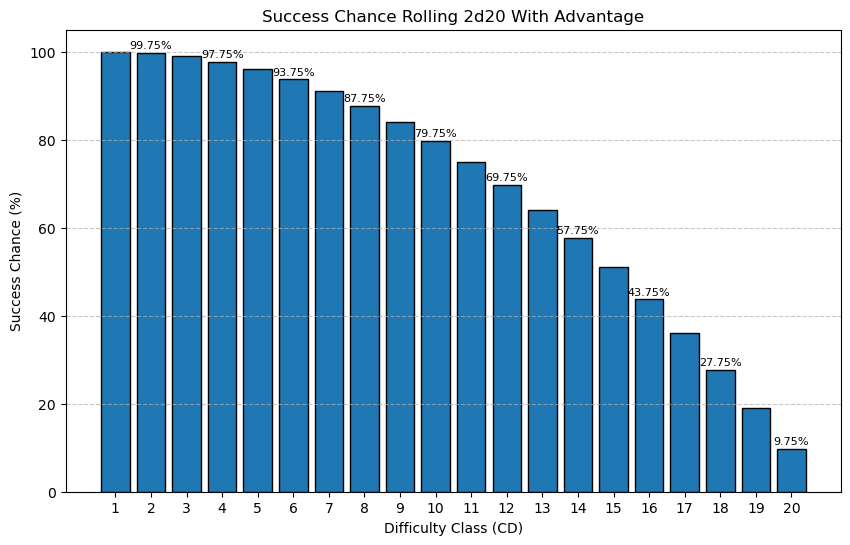

In [5]:
# ------------------------------------------
# Plot 1: Success chance with advantage
# ------------------------------------------
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Maior Valor"], df["Chance de Sucesso Vantagem %"], edgecolor="black")

# Add values above even-numbered bars
for bar, value in zip(bars, df["Maior Valor"]):
    if value % 2 == 0:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{height:.2f}%",
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.xlabel("Difficulty Class (CD)")
plt.ylabel("Success Chance (%)")
plt.title("Success Chance Rolling 2d20 With Advantage")
plt.xticks(range(1, 21))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("max_2d20_probability_distribution.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


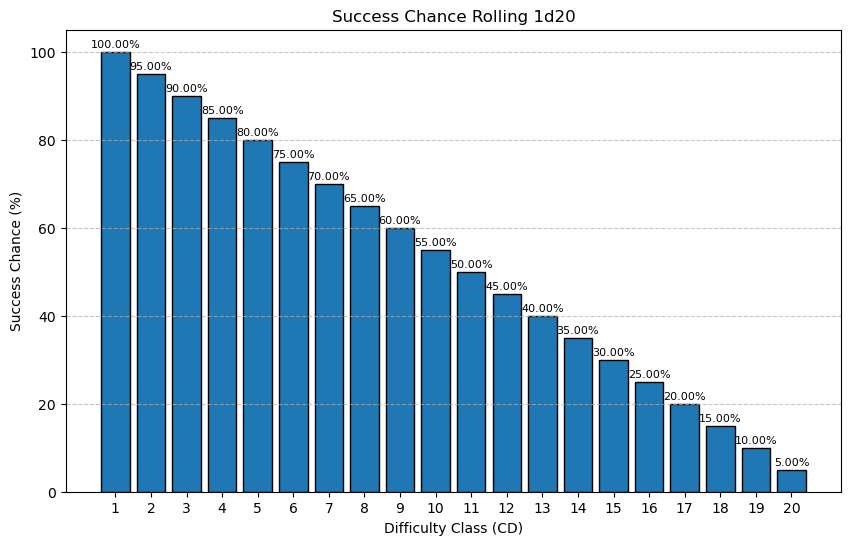

In [6]:
# ------------------------------------------
# Plot 2: Success chance with normal 1d20 roll
# ------------------------------------------
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Maior Valor"], df["Chance de Sucesso %"], edgecolor="black")

# Add labels above all bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{height:.2f}%",
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.xlabel("Difficulty Class (CD)")
plt.ylabel("Success Chance (%)")
plt.title("Success Chance Rolling 1d20")
plt.xticks(range(1, 21))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("distribuicao_2d20_vantagem.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


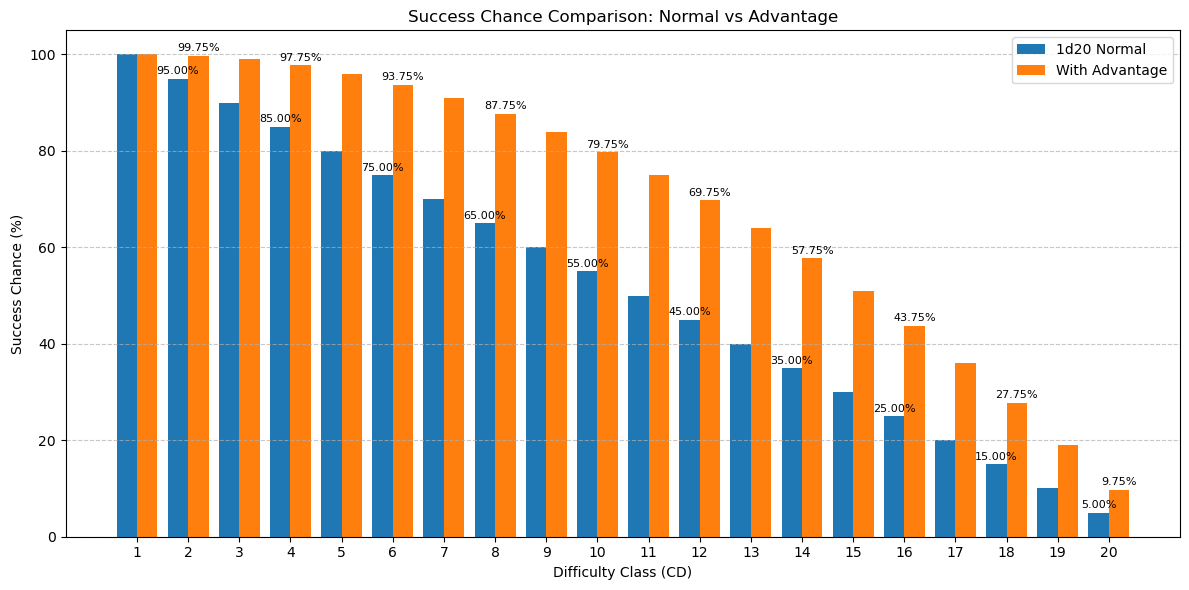

In [7]:
# ------------------------------------------
# Plot 3: Side-by-side comparison of success chance
# ------------------------------------------
x = np.arange(len(df))
width = 0.4

plt.figure(figsize=(12, 6))
bars_normal = plt.bar(x - width/2, df["Chance de Sucesso %"], width, label='1d20 Normal')
bars_adv = plt.bar(x + width/2, df["Chance de Sucesso Vantagem %"], width, label='With Advantage')

# Add labels above even-numbered bars for both series
for i in range(len(df)):
    if df["Maior Valor"].iloc[i] % 2 == 0:
        for bar in (bars_normal[i], bars_adv[i]):
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5,
                f"{height:.2f}%",
                ha='center',
                va='bottom',
                fontsize=8
            )

plt.xlabel("Difficulty Class (CD)")
plt.ylabel("Success Chance (%)")
plt.title("Success Chance Comparison: Normal vs Advantage")
plt.xticks(x, df["Maior Valor"])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("comparacao_chance_sucesso.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


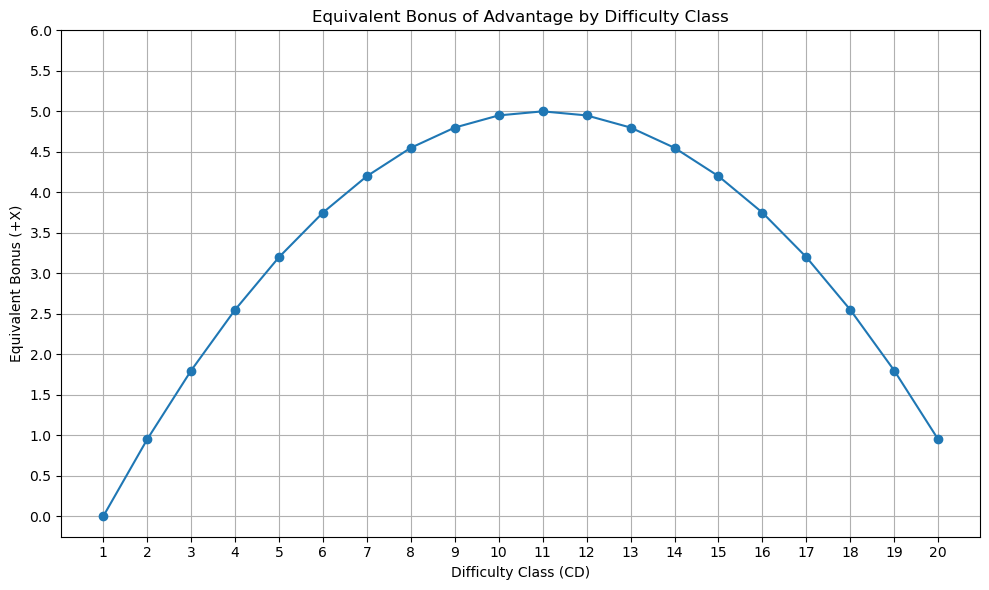

In [8]:
# ------------------------------------------
# Plot 4: Equivalent bonus of advantage as +X to the roll
# ------------------------------------------
cds = np.arange(1, 21)

# Success chance with normal roll and with advantage
prob_1d20 = (21 - cds) / 20
prob_advantage = 1 - ((cds - 1) / 20) ** 2

# Estimate the "bonus" needed on a normal roll to match the advantage chance
bonus_equivalente = (prob_advantage - prob_1d20) / 0.05

plt.figure(figsize=(10, 6))
plt.plot(cds, bonus_equivalente, marker='o')
plt.title("Equivalent Bonus of Advantage by Difficulty Class")
plt.xlabel("Difficulty Class (CD)")
plt.ylabel("Equivalent Bonus (+X)")
plt.grid(True)
plt.xticks(cds)
plt.yticks(np.arange(0, 6.1, 0.5))
plt.tight_layout()
plt.savefig("bonus_equivalente_vantagem.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()